## Ключевые моменты работы перцептрона:
- Архитектура: Один нейрон с несколькими входами и одним выходом
- Обучение: Правило Хебба - веса обновляются только при ошибочных предсказаниях
- Активация: Ступенчатая функция - выход всегда 0 или 1
- Ограничение: Может решать только линейно разделимые задачи
- Критерий остановки: Обучение завершается, когда все образцы классифицированы правильно

Обучение завершено на эпохе 3


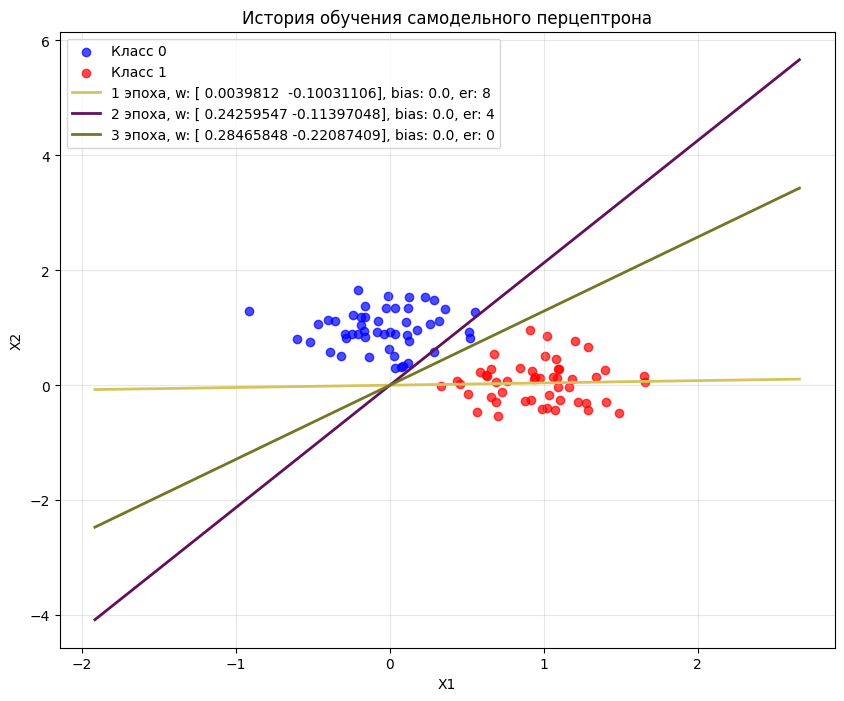

Конечный результат
Веса: [ 0.28465848 -0.22087409]
Смещение: 0.0


In [21]:
# Перцептрон самодельный

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
from copy import copy


# Класс простого перцептрона - базовой нейронной сети с одним слоем
class SimplePerceptron:
    def __init__(self, learning_rate=0.1, max_epochs=100):
        # learning_rate - скорость обучения, определяет размер шага при обновлении весов
        # max_epochs - максимальное количество эпох (проходов по всем данным) обучения
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None  # Весовые коэффициенты для каждого признака
        self.bias = None     # Смещение (bias) - позволяет сдвигать разделяющую границу
        self.w_history = []
        self.b_history = []
        self.er_history = []
        
    # Функция активации - определяет выход нейрона на основе взвешенной суммы
    def activation(self, x):
        # Используется ступенчатая функция активации:
        # на выходе либо 1 либо 0
        return 1 if x >= 0 else 0
    
    # Метод обучения перцептрона на тренировочных данных
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Инициализируем веса нулями 
        #self.weights = np.zeros(n_features)
        # или случайными значениями (для наглядности визуализации процесса обучения, при случайных значених обычно обучение занимает более эпох)
        self.weights = np.random.randn(2) * 0.1
        # Инициализируем смещение нулем
        self.bias = 0
        
        # Основной цикл обучения по эпохам
        for epoch in range(self.max_epochs):
            errors = 0  # Счетчик ошибок на текущей эпохе
            self.w_history.append(copy(self.weights))
            self.b_history.append(self.bias)
            
            # Проходим по всем образцам тренировочных данных
            for i in range(n_samples):
                # Прямое распространение (forward pass):
                # Вычисляем взвешенную сумму входов: w1*x1 + w2*x2 + bias
                linear_output = np.dot(X[i], self.weights) + self.bias
                # Применяем функцию активации для получения предсказания (0 или 1)
                prediction = self.activation(linear_output)
                
                # Обратное распространение и обновление весов:
                # Вычисляем разницу между истинным значением и предсказанием
                # Это правило обучения перцептрона (правило Хебба)
                update = self.learning_rate * (y[i] - prediction)
                
                # Обновляем веса: новый вес = старый вес + learning_rate * ошибка * вход
                self.weights += update * X[i]
                # Обновляем смещение: новое смещение = старое смещение + learning_rate * ошибка
                self.bias += update
                
                # Если было обновление (ошибка ≠ 0), увеличиваем счетчик ошибок
                if update != 0:
                    errors = errors + 1
                    #errors += int(update != 0)
            self.er_history.append(errors)
                
            # Критерий остановки: если на эпохе не было ошибок, обучение завершено
            if errors == 0:
                print(f"Обучение завершено на эпохе {epoch + 1}")
                break

    # Метод для предсказания классов новых данных после обучения
    def predict(self, X):
        # Вычисляем взвешенную сумму для всех образцов
        linear_output = np.dot(X, self.weights) + self.bias
        # Применяем функцию активации к каждому результату
        return np.array([self.activation(x) for x in linear_output])

## Создаем синтетические данные для демонстрации работы перцептрона ##

# Центры двух кластеров точек
coord_1 = [0, 1]  # центр первого множества (класс 0)
coord_2 = [1, 0]  # центр второго множества (класс 1)

# Генерируем два линейно разделимых кластера точек
# n_samples=100 - всего 100 точек
# centers - центры кластеров
# n_features=2 - двумерное пространство (для визуализации)
# random_state=42 для воспроизводимости результатов
# cluster_std - стандартное отклонение (разброс точек вокруг центров), чем выше тем больше разброс и множества могут пересекаться
X, y = make_blobs(n_samples=100, centers=[coord_1, coord_2], n_features=2, 
                  random_state=42, cluster_std=0.35)

# Создаем и обучаем перцептрон
perceptron_custom = SimplePerceptron(learning_rate=0.1, max_epochs=100)
perceptron_custom.fit(X, y)

## Визуализация результатов ##
plt.figure(figsize=(10, 8))

# Рисуем точки двух классов разными цветами
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Класс 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Класс 1', alpha=0.7)

# Рисуем разделяющую прямую, найденную перцептроном
# Определяем границы графика
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Создаем точки для оси X
xx = np.linspace(x_min, x_max, 100)

# Вычисляем соответствующие точки для оси Y разделяющей прямой:
# Уравнение разделяющей прямой: w0*x + w1*y + b = 0 
# Преобразуем к виду: y = (-w0*x - b)/w1
cnt = 1
for weights, bias, er in zip(perceptron_custom.w_history, perceptron_custom.b_history, perceptron_custom.er_history):
    if weights[1] != 0:
        yy = (-weights[0] * xx - bias) / weights[1]
        color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
        plt.plot(xx, yy, label=f'{cnt} эпохa, w: {weights}, bias: {bias:.1f}, er: {er}', linewidth=2, color=color)
    cnt = cnt + 1

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('История обучения самодельного перцептрона')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Выводим найденные параметры модели
print("Конечный результат")
print(f"Веса: {perceptron_custom.weights}")
print(f"Смещение: {perceptron_custom.bias:.1f}")